In [1]:
import os
import torch
import torchvision
from torchvision import transforms, datasets

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
curr_dir = os.getcwd()

# Load dataset
train = datasets.MNIST(curr_dir, train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST(curr_dir, train=False, download=True,
                     transform = transforms.Compose([transforms.ToTensor()]))

In [4]:
# Load batch
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [5]:
import torch.nn as nn
import torch.nn.functional as F

In [7]:
# Build network
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        # fully connected layer (input, output)
        self.fc1 = nn.Linear(784, 64) # input layer
        self.fc2 = nn.Linear(64, 64) # hidden
        self.fc3 = nn.Linear(64, 64) # hidden
        self.fc4 = nn.Linear(64, 10) # output layer
        
    def forward(self, x):
        # how data is feed forward through layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1) # Softmax convert numbers to probabilities
        
        return x
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [9]:
X = torch.rand((28, 28))
X

tensor([[1.8870e-01, 4.5895e-01, 5.2126e-01, 8.2276e-01, 5.7905e-01, 4.4385e-02,
         8.8519e-01, 1.7526e-01, 6.0793e-01, 7.7147e-01, 3.9809e-03, 5.3486e-01,
         1.9130e-01, 6.6637e-02, 3.8041e-01, 3.9901e-01, 2.5414e-01, 2.8421e-01,
         4.1730e-02, 5.2091e-03, 1.7356e-01, 9.3105e-01, 8.5480e-01, 6.0481e-01,
         3.5054e-01, 4.4501e-01, 7.8347e-01, 5.9879e-01],
        [5.7473e-01, 6.5527e-01, 4.0551e-01, 1.6584e-01, 4.1889e-01, 8.6490e-01,
         5.8185e-01, 3.1285e-01, 3.5441e-01, 9.4413e-01, 6.9615e-01, 7.5845e-01,
         3.4451e-01, 5.0843e-01, 2.1550e-01, 1.0327e-01, 6.4969e-01, 5.7878e-01,
         9.7584e-01, 9.1170e-01, 6.9635e-01, 8.9898e-01, 9.4706e-01, 5.5853e-02,
         9.7634e-02, 9.8516e-02, 3.4151e-01, 8.1281e-01],
        [3.7583e-01, 9.8827e-01, 3.5945e-01, 5.7603e-01, 8.6626e-01, 7.8527e-01,
         7.9029e-01, 7.8760e-01, 7.3239e-01, 7.6074e-01, 8.3627e-01, 6.8464e-01,
         9.4495e-01, 8.8526e-01, 5.2470e-01, 6.3966e-01, 3.2551e-01, 9.429

In [15]:
output = net(X.view(-1, 28 * 28)) # -1 for any size of batch size

In [16]:
output

tensor([[-2.3681, -2.3452, -2.2136, -2.3395, -2.2496, -2.2799, -2.2298, -2.5236,
         -2.1970, -2.3202]], grad_fn=<LogSoftmaxBackward>)

In [19]:
# Set up optimizer
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001) # (what is adjustable, learning rate)

EPOCHS = 3 # number of passes

for epoch in range(EPOCHS):
    for data in trainset: # data is batch
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28 * 28))
        
        # calculate loss
        loss = F.nll_loss(output, y)
        loss.backward() # backpropagation
        optimizer.step() # adjust weight and bias
    print(loss)

tensor(0.0623, grad_fn=<NllLossBackward>)
tensor(0.0093, grad_fn=<NllLossBackward>)
tensor(0.0041, grad_fn=<NllLossBackward>)


In [20]:
correct = 0
total = 0

# Count how many prediction is correct in training set
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28 * 28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.988


In [27]:
correct = 0
total = 0

# Count how many prediction is correct in test set
with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28 * 28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.975


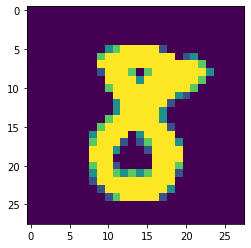

In [24]:
plt.imshow(X[1].view(28, 28))

In [26]:
print(torch.argmax(net(X[1].view(-1, 28 * 28))[0]))

tensor(8)
